# World Cup 2023 Data Analysis

Tasks to Perform:

1. Team Performance Analysis:
 - Explore team-wise performance metrics.
 - Analyze runs scored, wickets taken, and batting/bowling styles.
 - Identify top-performing teams and their strengths.

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [61]:
data = pd.read_csv('/content/drive/MyDrive/World Cup 2023 Analysis/CWC23_all_innings.csv')
df = data
print(df.head())
print(df.info)
print(df.isnull().mean())
df.fillna(0, inplace=True)
df.dtypes
shape = df.shape
print("Shape = {}".format(shape))

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground start_date  \
0             0.05       0.750000  v South Africa    Chennai  27-Oct-23   
1             0.05       0.750000         v India    Lucknow  29-Oct-23   
2             0.05       0.800000       v England  Ahmedabad   5-Oct-23   
3             0.05       0.816667    v Bangladesh    Chennai  13-Oct-23   
4             0.05       0.816667      v Pakistan    Chennai  23-Oct-23   

   overs  mdns  econ  inns  4s  6s  sr  not_out  mins  
0   10.0   0.0   4.5     2 NaN NaN NaN      NaN   NaN  
1   10.0   2.0   4.5     1 N

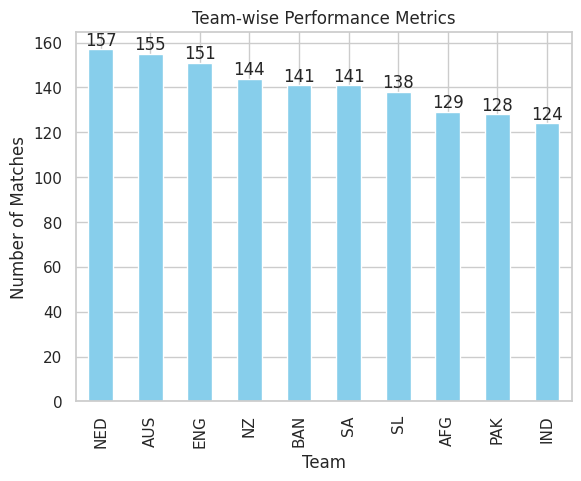

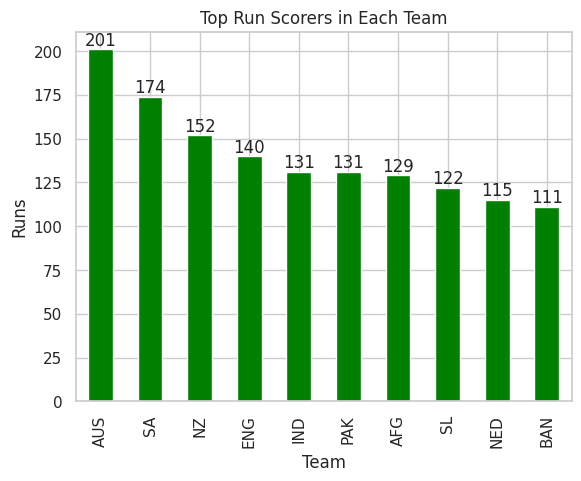

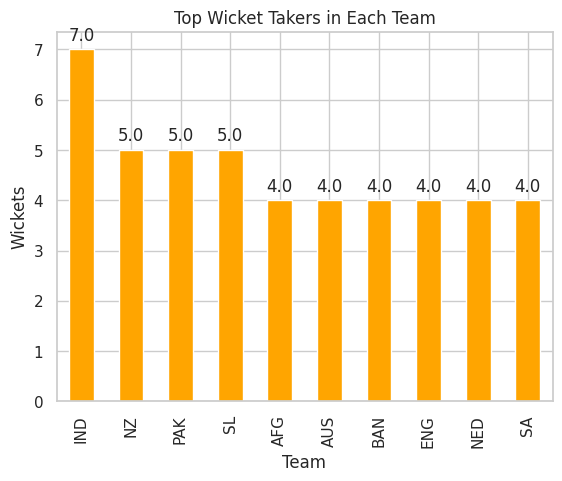

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'df'
# If your data is in a CSV file, you can read it using:
# df = pd.read_csv('your_data_file.csv')

# Display the first few rows of the dataframe
df.head()

# Team-wise Performance Metrics
team_performance = df['team'].value_counts()
team_performance.plot(kind='bar', color='skyblue')
plt.title('Team-wise Performance Metrics')
plt.xlabel('Team')
plt.ylabel('Number of Matches')

# Adding annotations on top of the bars
for i, v in enumerate(team_performance):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# Runs Scored Analysis
top_run_scorers = df.groupby('team')['runs'].max().sort_values(ascending=False)
top_run_scorers.plot(kind='bar', color='green')
plt.title('Top Run Scorers in Each Team')
plt.xlabel('Team')
plt.ylabel('Runs')

# Adding annotations on top of the bars
for i, v in enumerate(top_run_scorers):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# Wickets Taken Analysis
top_wicket_takers = df.groupby('team')['wkts'].max().sort_values(ascending=False)
top_wicket_takers.plot(kind='bar', color='orange')
plt.title('Top Wicket Takers in Each Team')
plt.xlabel('Team')
plt.ylabel('Wickets')

# Adding annotations on top of the bars
for i, v in enumerate(top_wicket_takers):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# Batting Styles Analysis
# Add your code here for analyzing batting styles

# Bowling Styles Analysis
# Add your code here for analyzing bowling styles


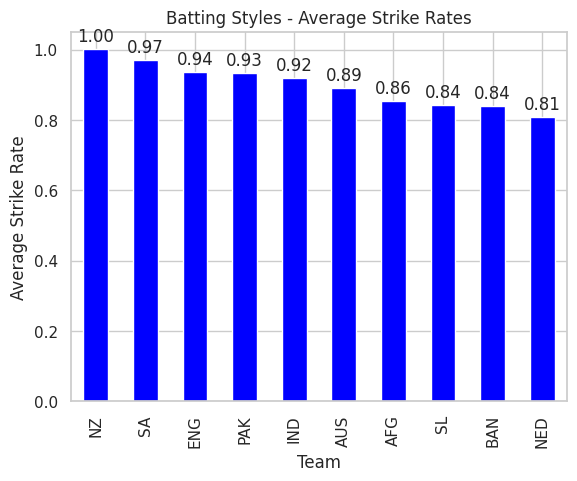

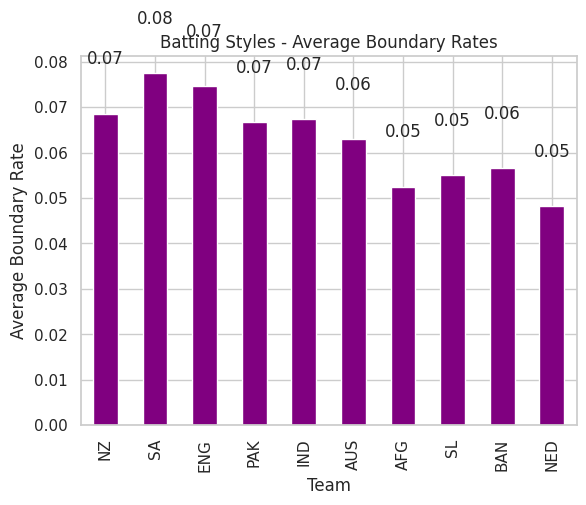

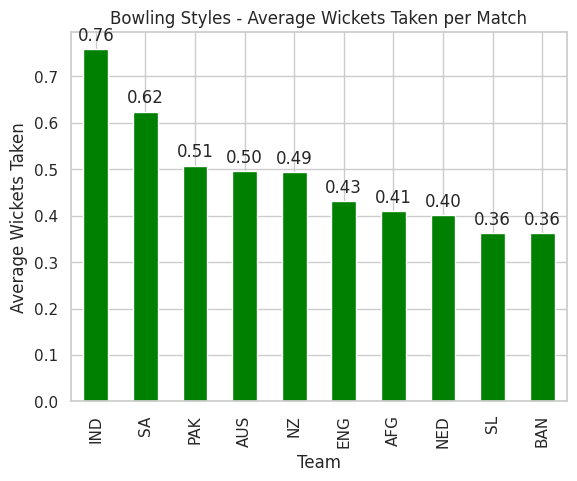

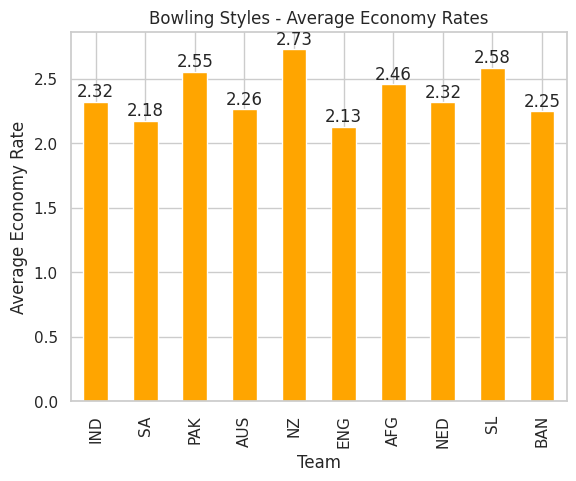

Top-performing teams and their strengths:
      runs  wkts
team            
NZ    5376  71.0
AUS   5234  77.0
SA    5097  88.0
PAK   4786  65.0
IND   4783  94.0
ENG   4396  65.0
SL    4366  50.0
BAN   4358  51.0
NED   4268  63.0
AFG   4134  53.0


In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'df'
# If your data is in a CSV file, you can read it using:
# df = pd.read_csv('your_data_file.csv')

# Display the first few rows of the dataframe
df.head()

# Batting Styles Analysis
# Calculate strike rates and boundaries
df['strike_rate'] = df['runs'] / df['bb_bf']
df['boundary_rate'] = (df['4s'] + df['6s']) / df['bb_bf']

# Identify top run-scorers and their preferred batting styles
top_batting_styles = df.groupby('team').agg({'strike_rate': 'mean', 'boundary_rate': 'mean'}).sort_values(by='strike_rate', ascending=False)

# Plotting Strike Rates
top_batting_styles['strike_rate'].plot(kind='bar', color='blue')
plt.title('Batting Styles - Average Strike Rates')
plt.xlabel('Team')
plt.ylabel('Average Strike Rate')

# Adding annotations on top of the bars
for i, v in enumerate(top_batting_styles['strike_rate']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Plotting Boundary Rates
top_batting_styles['boundary_rate'].plot(kind='bar', color='purple')
plt.title('Batting Styles - Average Boundary Rates')
plt.xlabel('Team')
plt.ylabel('Average Boundary Rate')

# Adding annotations on top of the bars
for i, v in enumerate(top_batting_styles['boundary_rate']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Bowling Styles Analysis
# Identify top wicket-takers and their bowling styles
top_bowling_styles = df.groupby('team').agg({'wkts': 'mean', 'econ': 'mean'}).sort_values(by='wkts', ascending=False)

# Plotting Average Wickets Taken per Match
top_bowling_styles['wkts'].plot(kind='bar', color='green')
plt.title('Bowling Styles - Average Wickets Taken per Match')
plt.xlabel('Team')
plt.ylabel('Average Wickets Taken')

# Adding annotations on top of the bars
for i, v in enumerate(top_bowling_styles['wkts']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Plotting Average Economy Rates
top_bowling_styles['econ'].plot(kind='bar', color='orange')
plt.title('Bowling Styles - Average Economy Rates')
plt.xlabel('Team')
plt.ylabel('Average Economy Rate')

# Adding annotations on top of the bars
for i, v in enumerate(top_bowling_styles['econ']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.show()

# Identify top-performing teams and their strengths
top_teams = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum'}).sort_values(by=['runs', 'wkts'], ascending=False)

print("Top-performing teams and their strengths:")
print(top_teams)


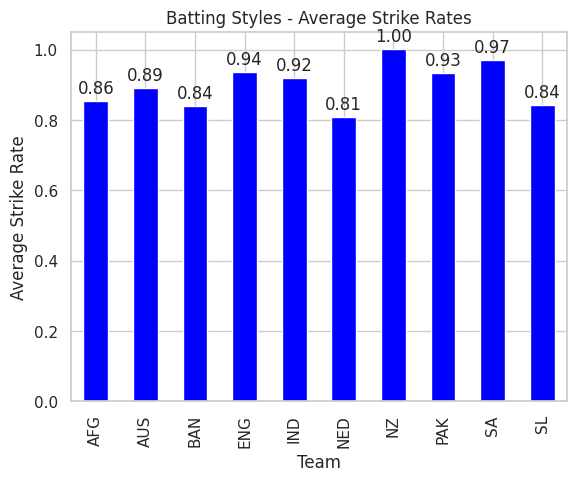

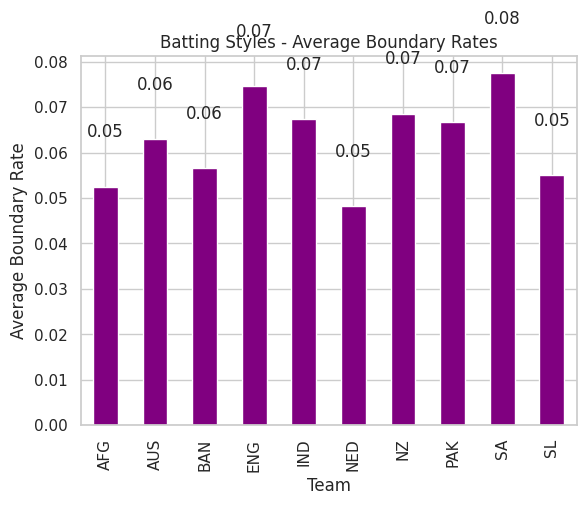

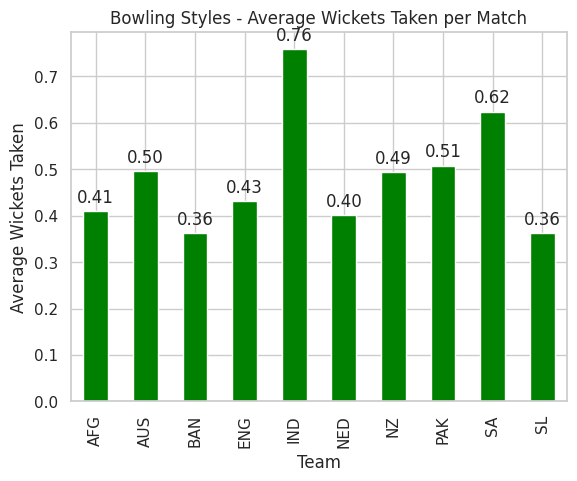

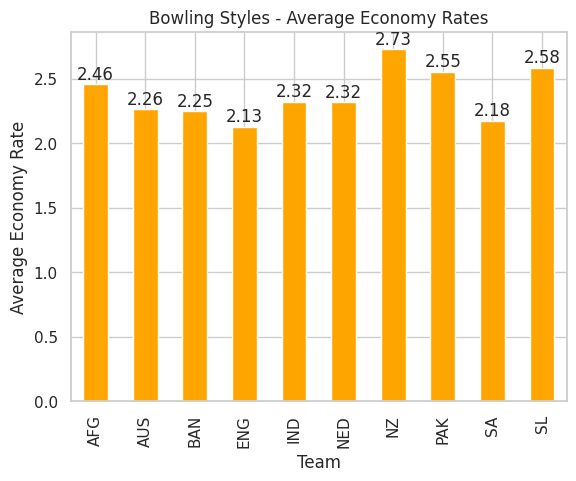

Top-performing teams and their strengths:
      runs  wkts
team            
NZ    5376  71.0
AUS   5234  77.0
SA    5097  88.0
PAK   4786  65.0
IND   4783  94.0
ENG   4396  65.0
SL    4366  50.0
BAN   4358  51.0
NED   4268  63.0
AFG   4134  53.0


In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'df'
# If your data is in a CSV file, you can read it using:
# df = pd.read_csv('your_data_file.csv')

# Display the first few rows of the dataframe
df.head()

def plot_bar_chart(data, title, xlabel, ylabel, color):
    data.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    for i, v in enumerate(data):
        plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')
    plt.show()

def analyze_batting_styles(df):
    df['strike_rate'] = df['runs'] / df['bb_bf']
    df['boundary_rate'] = (df['4s'] + df['6s']) / df['bb_bf']
    top_batting_styles = df.groupby('team').agg({'strike_rate': 'mean', 'boundary_rate': 'mean'})

    plot_bar_chart(top_batting_styles['strike_rate'], 'Batting Styles - Average Strike Rates', 'Team', 'Average Strike Rate', 'blue')
    plot_bar_chart(top_batting_styles['boundary_rate'], 'Batting Styles - Average Boundary Rates', 'Team', 'Average Boundary Rate', 'purple')

def analyze_bowling_styles(df):
    top_bowling_styles = df.groupby('team').agg({'wkts': 'mean', 'econ': 'mean'})

    plot_bar_chart(top_bowling_styles['wkts'], 'Bowling Styles - Average Wickets Taken per Match', 'Team', 'Average Wickets Taken', 'green')
    plot_bar_chart(top_bowling_styles['econ'], 'Bowling Styles - Average Economy Rates', 'Team', 'Average Economy Rate', 'orange')

def identify_top_teams(df):
    top_teams = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum'}).sort_values(by=['runs', 'wkts'], ascending=False)
    print("Top-performing teams and their strengths:")
    print(top_teams)

# Analyze batting styles
analyze_batting_styles(df)

# Analyze bowling styles
analyze_bowling_styles(df)

# Identify top-performing teams
identify_top_teams(df)


In [65]:
# Calculate total runs scored and total wickets taken by each team
team_stats = df.groupby('team').agg({'runs': 'sum', 'wkts': 'sum', '4s': 'sum', '6s': 'sum'}).reset_index()

# Calculate additional metrics such as batting and bowling averages
team_stats['batting_avg'] = team_stats['runs'] / team_stats['wkts']
team_stats['bowling_avg'] = team_stats['wkts'] / team_stats['runs']

# Display the calculated team statistics
team_stats


team  runs  wkts     4s    6s  batting_avg  bowling_avg
0  AFG  4134  53.0  178.0  42.0    78.000000     0.012821
1  AUS  5234  77.0  265.0  92.0    67.974026     0.014712
2  BAN  4358  51.0  188.0  43.0    85.450980     0.011703
3  ENG  4396  65.0  216.0  51.0    67.630769     0.014786
4  IND  4783  94.0  265.0  89.0    50.882979     0.019653
5  NED  4268  63.0  163.0  33.0    67.746032     0.014761
6   NZ  5376  71.0  265.0  82.0    75.718310     0.013207
7  PAK  4786  65.0  220.0  60.0    73.630769     0.013581
8   SA  5097  88.0  243.0  99.0    57.920455     0.017265
9   SL  4366  50.0  201.0  45.0    87.320000     0.011452

Top-Performing Teams:
AUS    86
ENG    81
NED    77
SL     75
NZ     74
AFG    73
BAN    72
SA     70
PAK    69
IND    68
Name: team, dtype: int64


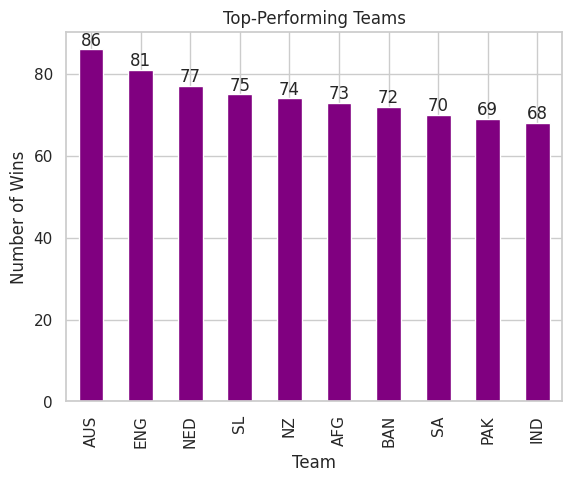


Strengths of AUS:
Highest Run-Scorer: GJ Maxwell (AUS) (201 runs)
Leading Wicket-Taker: A Zampa (AUS) (4.0 wickets)

Strengths of ENG:
Highest Run-Scorer: DJ Malan (ENG) (140 runs)
Leading Wicket-Taker: RJW Topley (ENG) (4.0 wickets)

Strengths of NED:
Highest Run-Scorer: BFW de Leede (NED) (115 runs)
Leading Wicket-Taker: PA van Meekeren (NED) (4.0 wickets)

Strengths of SL:
Highest Run-Scorer: BKG Mendis (SL) (122 runs)
Leading Wicket-Taker: D Madushanka (SL) (5.0 wickets)

Strengths of NZ:
Highest Run-Scorer: DP Conway (NZ) (152 runs)
Leading Wicket-Taker: MJ Santner (NZ) (5.0 wickets)

Strengths of AFG:
Highest Run-Scorer: Ibrahim Zadran (AFG) (129 runs)
Leading Wicket-Taker: Fazalhaq Farooqi (AFG) (4.0 wickets)

Strengths of BAN:
Highest Run-Scorer: Mahmudullah (BAN) (111 runs)
Leading Wicket-Taker: Mahedi Hasan (BAN) (4.0 wickets)

Strengths of SA:
Highest Run-Scorer: Q de Kock (SA) (174 runs)
Leading Wicket-Taker: G Coetzee (SA) (4.0 wickets)

Strengths of PAK:
Highest Run-Scor

In [66]:
# Identify top-performing teams based on the total number of wins
top_teams = df[df['inns'] == 1]['team'].value_counts().sort_values(ascending=False)

# Displaying the top-performing teams
print("Top-Performing Teams:")
print(top_teams)

# Plotting the top-performing teams
top_teams.plot(kind='bar', color='purple')
plt.title('Top-Performing Teams')
plt.xlabel('Team')
plt.ylabel('Number of Wins')

# Adding annotations on top of the bars
for i, v in enumerate(top_teams):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

plt.show()

# Identify strengths of the top-performing teams
for team in top_teams.index:
    team_data = df[df['team'] == team]

    # Displaying the highest run-scorer and wicket-taker for each top-performing team
    print(f"\nStrengths of {team}:")
    top_run_scorer = team_data.loc[team_data['runs'].idxmax()]['player']
    top_wicket_taker = team_data.loc[team_data['wkts'].idxmax()]['player']

    print(f"Highest Run-Scorer: {top_run_scorer} ({team_data['runs'].max()} runs)")
    print(f"Leading Wicket-Taker: {top_wicket_taker} ({team_data['wkts'].max()} wickets)")


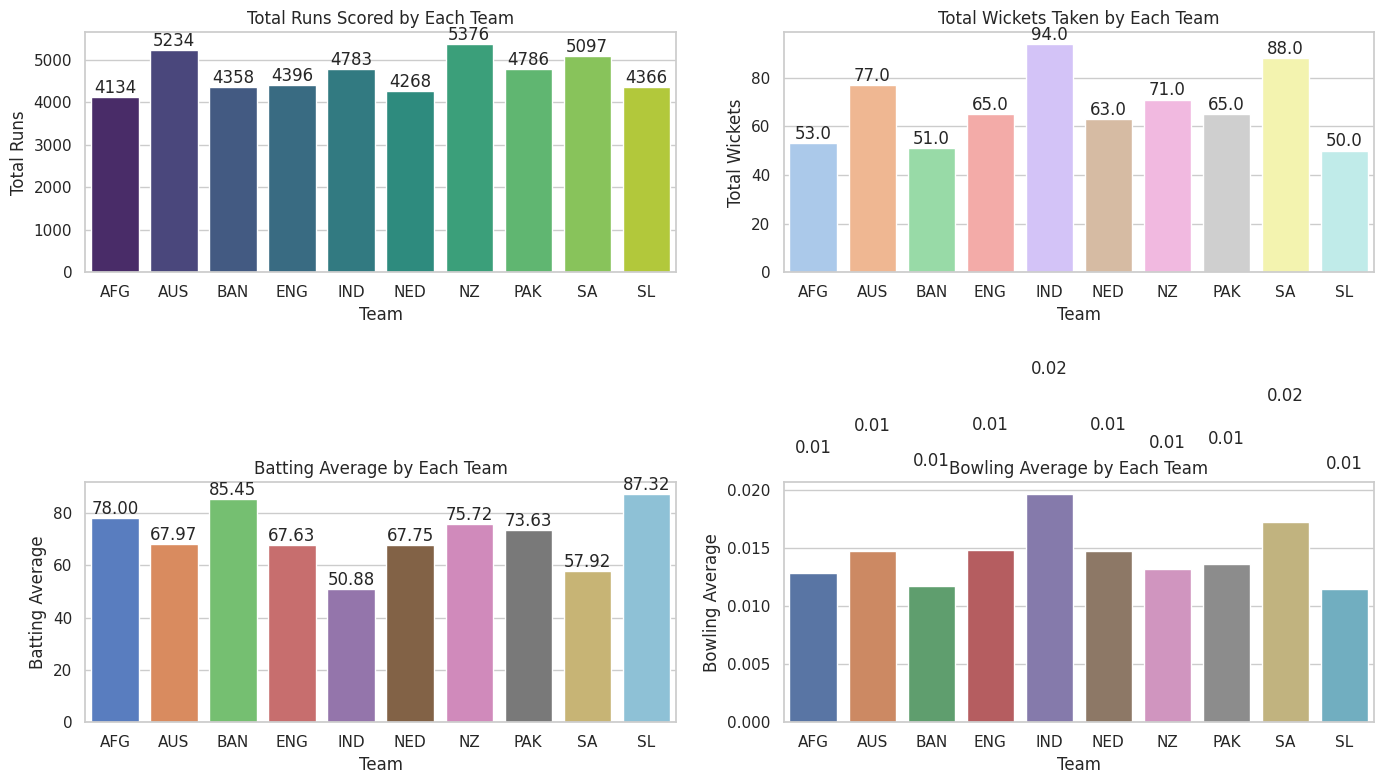

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'team_stats'
# If your data is in a CSV file, you can read it using:
# team_stats = pd.read_csv('your_data_file.csv')

# Adding annotations on top of the bars for each subplot
plt.figure(figsize=(14, 8))

# Strength 1: Total Runs Scored
plt.subplot(2, 2, 1)
sns.barplot(x='team', y='runs', data=team_stats, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')

# Adding annotations on top of the bars
for i, v in enumerate(team_stats['runs']):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Strength 2: Total Wickets Taken
plt.subplot(2, 2, 2)
sns.barplot(x='team', y='wkts', data=team_stats, palette='pastel')
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')

# Adding annotations on top of the bars
for i, v in enumerate(team_stats['wkts']):
    plt.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Strength 3: Batting Average
plt.subplot(2, 2, 3)
sns.barplot(x='team', y='batting_avg', data=team_stats, palette='muted')
plt.title('Batting Average by Each Team')
plt.xlabel('Team')
plt.ylabel('Batting Average')

# Adding annotations on top of the bars
for i, v in enumerate(team_stats['batting_avg']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

# Strength 4: Bowling Average
plt.subplot(2, 2, 4)
sns.barplot(x='team', y='bowling_avg', data=team_stats, palette='deep')
plt.title('Bowling Average by Each Team')
plt.xlabel('Team')
plt.ylabel('Bowling Average')

# Adding annotations on top of the bars
for i, v in enumerate(team_stats['bowling_avg']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


2 - Player Performance Analysis:
 - Evaluate individual player statistics for both batting and bowling.
 - Identify leading run-scorers and wicket-takers.
 - Assess the impact of players on their team's performance.

In [68]:
# Batting Statistics
batting_stats = df[df['bat_or_bowl'] == 'bat']

# Calculate Batting Metrics
batting_player_stats = batting_stats.groupby('player').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',  # Assuming 'sr' is the strike rate
    'mins': 'sum',
    'not_out': 'sum'
}).reset_index()

# Additional Batting Metrics
batting_player_stats['batting_avg'] = batting_player_stats['runs'] / (batting_player_stats['not_out'] + 1)

# Display Batting Statistics
print("Batting Statistics:")
print(batting_player_stats)

# Bowling Statistics
bowling_stats = df[df['bat_or_bowl'] == 'bowl']

# Calculate Bowling Metrics
bowling_player_stats = bowling_stats.groupby('player').agg({
    'wkts': 'sum',
    'runs': 'sum',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Additional Bowling Metrics
bowling_player_stats['bowling_avg'] = bowling_player_stats['runs'] / (bowling_player_stats['wkts'] + 1)


Batting Statistics:
                    player  runs    4s   6s          sr    mins  not_out  \
0             A Dutt (NED)    70   1.0  5.0   88.586667   124.0      3.0   
1            A Zampa (AUS)    48   5.0  0.0   75.230000    84.0      3.0   
2       AAP Atkinson (ENG)    37   7.0  0.0   91.665000    40.0      1.0   
3          AD Mathews (SL)    51   4.0  1.0   48.927500   153.0      0.0   
4          AK Markram (SA)   406  44.0  9.0  151.525000   510.0      1.0   
..                     ...   ...   ...  ...         ...     ...      ...   
141        Usama Mir (PAK)     0   0.0  0.0    0.000000     4.0      0.0   
142          V Kohli (IND)   711  64.0  9.0   82.956000  1097.0      3.0   
143  Vikramjit Singh (NED)    98  12.0  1.0   52.366667   199.0      0.0   
144        W Barresi (NED)    83  11.0  1.0   66.167500   137.0      0.0   
145          WA Young (NZ)   206  23.0  6.0   68.415000   344.0      0.0   

     batting_avg  
0          17.50  
1          12.00  
2         

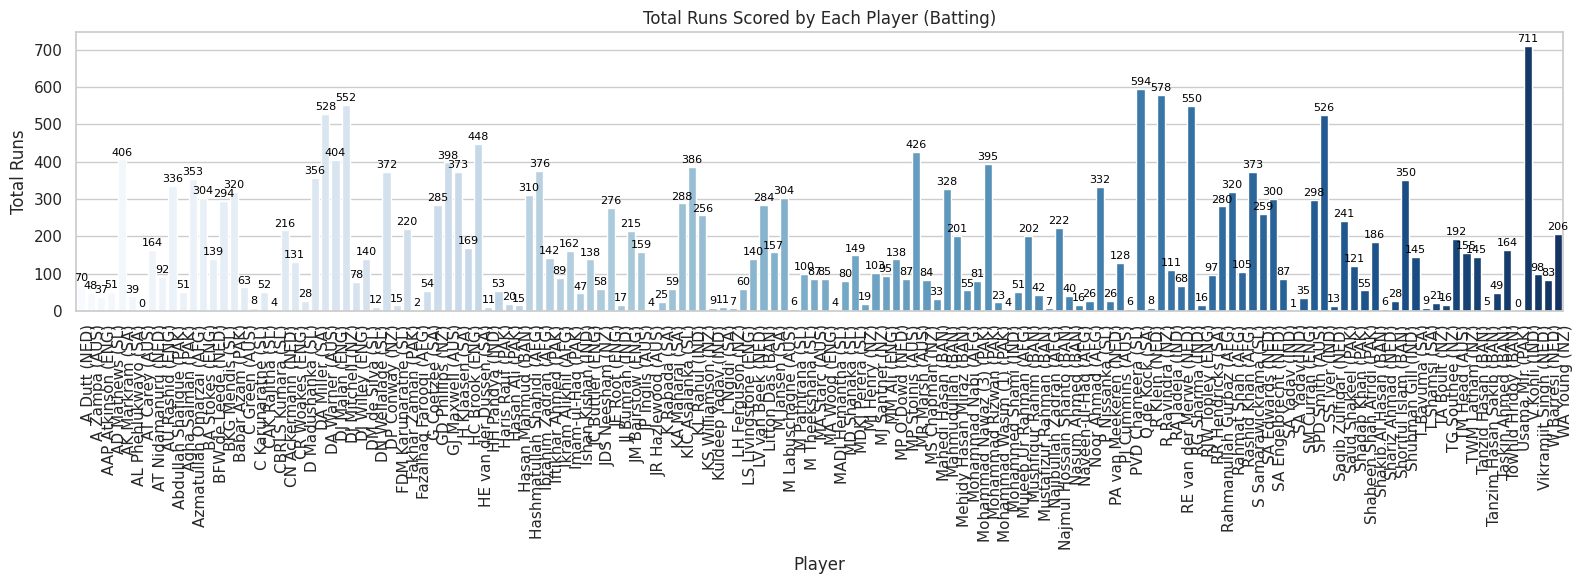

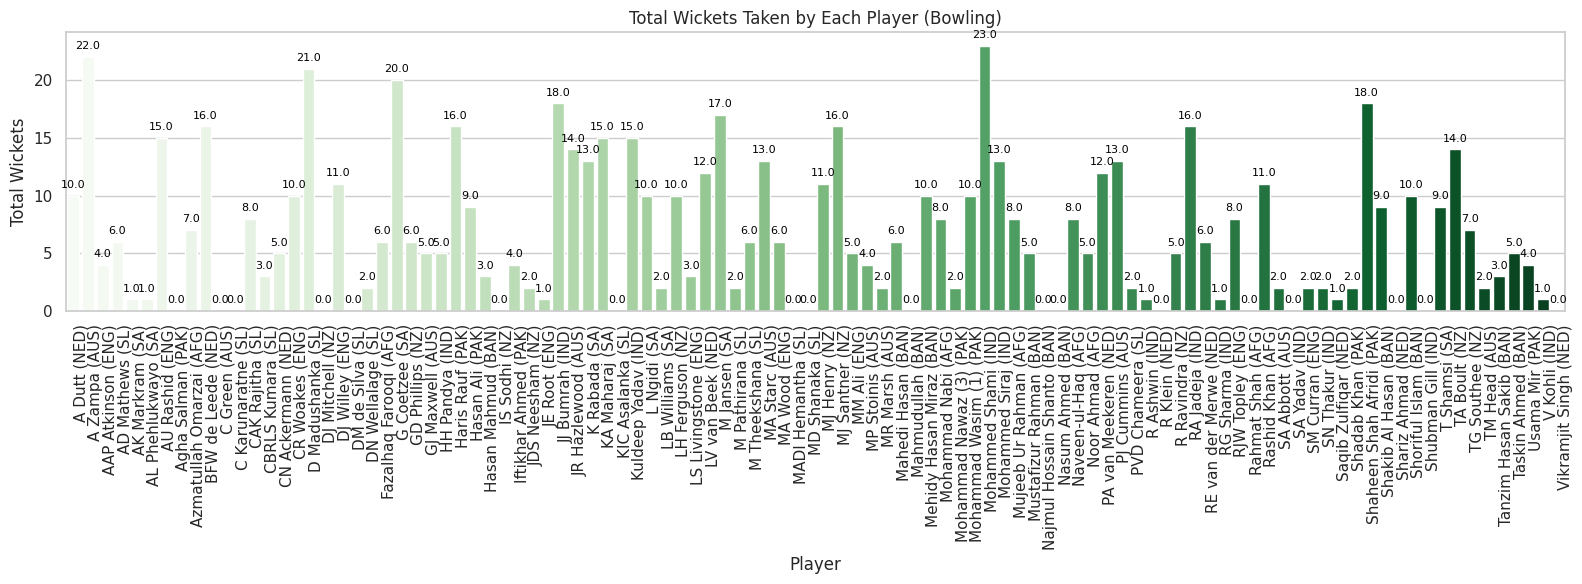

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is already loaded into the DataFrame 'df'

# Batting Statistics
batting_stats = df[df['bat_or_bowl'] == 'bat']

# Calculate Batting Metrics
batting_player_stats = batting_stats.groupby('player').agg({
    'runs': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'sr': 'mean',  # Assuming 'sr' is the strike rate
    'mins': 'sum',
    'not_out': 'sum'
}).reset_index()

# Additional Batting Metrics
batting_player_stats['batting_avg'] = batting_player_stats['runs'] / (batting_player_stats['not_out'] + 1)

# Bowling Statistics
bowling_stats = df[df['bat_or_bowl'] == 'bowl']

# Calculate Bowling Metrics
bowling_player_stats = bowling_stats.groupby('player').agg({
    'wkts': 'sum',
    'runs': 'sum',
    'econ': 'mean',
    '4s': 'sum',
    '6s': 'sum'
}).reset_index()

# Additional Bowling Metrics
bowling_player_stats['bowling_avg'] = bowling_player_stats['runs'] / (bowling_player_stats['wkts'] + 1)

# Visualize the Results

# Batting Metrics Visualization with Annotations
plt.figure(figsize=(16, 6))
batting_plot = sns.barplot(x='player', y='runs', data=batting_player_stats, palette='Blues')
batting_plot.set(title='Total Runs Scored by Each Player (Batting)', xlabel='Player', ylabel='Total Runs')
batting_plot.set_xticklabels(batting_plot.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Add annotations for total runs
for index, value in enumerate(batting_player_stats['runs']):
    batting_plot.text(index, value + 5, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()

# Bowling Metrics Visualization with Annotations
plt.figure(figsize=(16, 6))
bowling_plot = sns.barplot(x='player', y='wkts', data=bowling_player_stats, palette='Greens')
bowling_plot.set(title='Total Wickets Taken by Each Player (Bowling)', xlabel='Player', ylabel='Total Wickets')
bowling_plot.set_xticklabels(bowling_plot.get_xticklabels(), rotation=90, ha='right', rotation_mode='anchor')

# Add annotations for total wickets
for index, value in enumerate(bowling_player_stats['wkts']):
    bowling_plot.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=8, color='black')

plt.tight_layout()
plt.show()



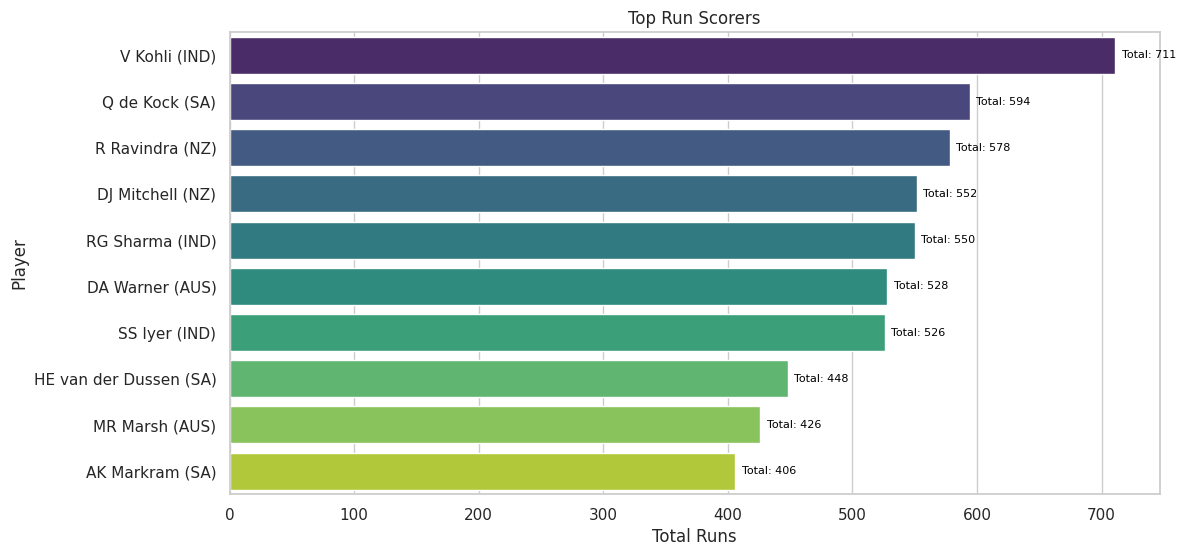

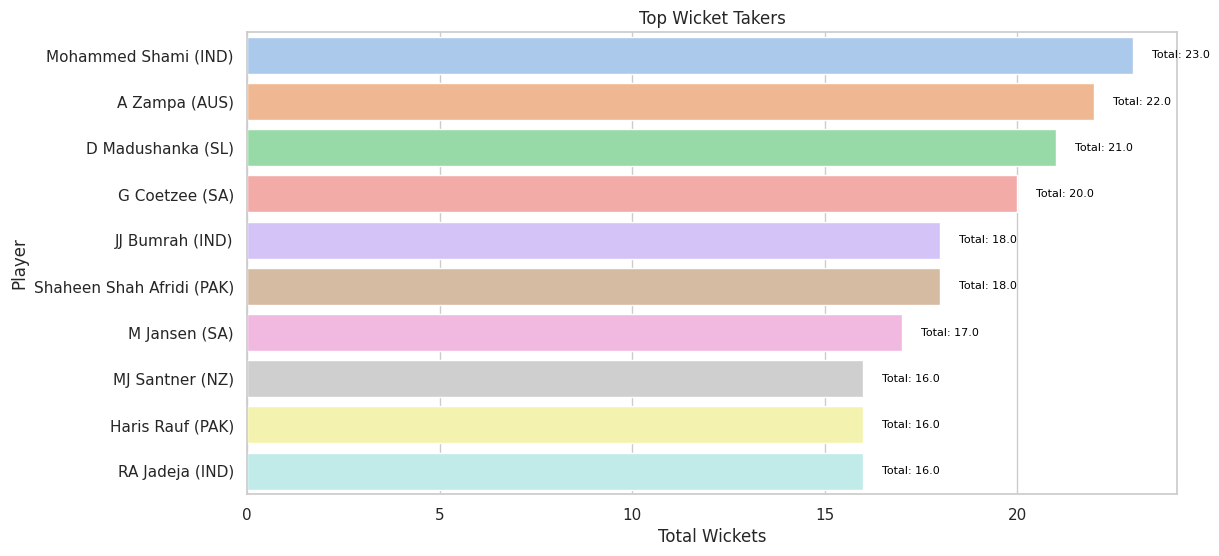

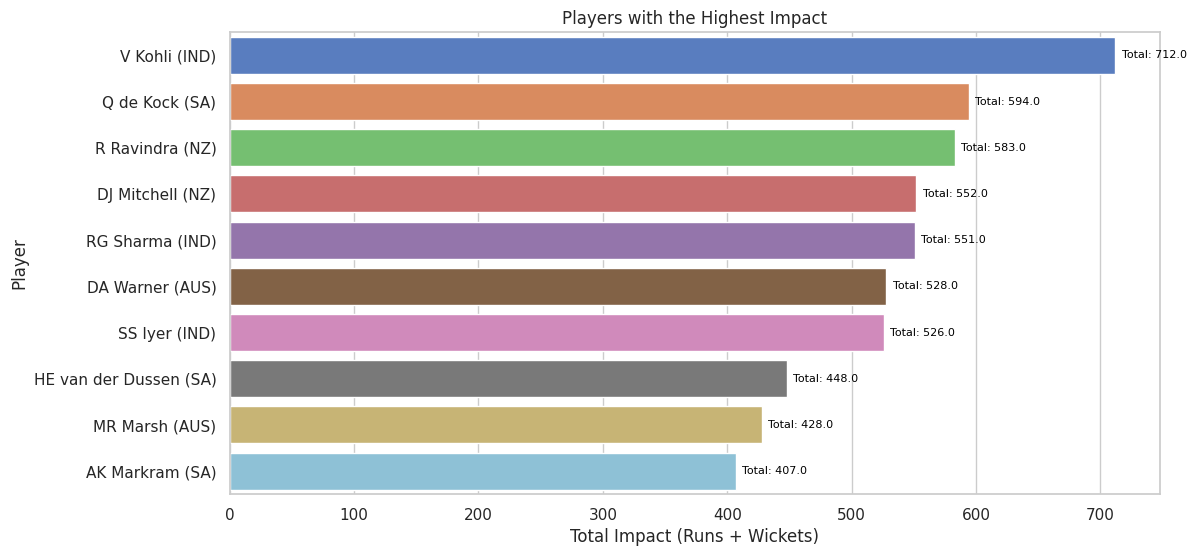

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate data for batting and bowling
batting_data = df[df['bat_or_bowl'] == 'bat']
bowling_data = df[df['bat_or_bowl'] == 'bowl']

# Evaluate individual player statistics for batting
player_batting_stats = batting_data.groupby('player').agg({'runs': 'sum', '4s': 'sum', '6s': 'sum'}).reset_index()

# Identify leading run-scorers
top_run_scorers = player_batting_stats.sort_values(by='runs', ascending=False).head(10)

# Visualize leading run-scorers
plt.figure(figsize=(12, 6))
batting_plot = sns.barplot(x='runs', y='player', data=top_run_scorers, palette='viridis')
plt.title('Top Run Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')

# Add annotations for total runs
for index, value in enumerate(top_run_scorers['runs']):
    batting_plot.text(value + 5, index, f'Total: {value}', ha='left', va='center', fontsize=8, color='black')

plt.show()

# Evaluate individual player statistics for bowling
player_bowling_stats = bowling_data.groupby('player').agg({'wkts': 'sum', 'econ': 'mean'}).reset_index()

# Identify leading wicket-takers
top_wicket_takers = player_bowling_stats.sort_values(by='wkts', ascending=False).head(10)

# Visualize leading wicket-takers
plt.figure(figsize=(12, 6))
bowling_plot = sns.barplot(x='wkts', y='player', data=top_wicket_takers, palette='pastel')
plt.title('Top Wicket Takers')
plt.xlabel('Total Wickets')
plt.ylabel('Player')

# Add annotations for total wickets
for index, value in enumerate(top_wicket_takers['wkts']):
    bowling_plot.text(value + 0.5, index, f'Total: {value}', ha='left', va='center', fontsize=8, color='black')

plt.show()

# Assess the impact of players on team performance
# You can use various metrics like runs scored, wickets taken, batting and bowling averages, etc.
# For simplicity, let's consider the total runs and total wickets contributed by each player.

player_impact = pd.merge(player_batting_stats, player_bowling_stats, on='player', how='outer').fillna(0)
player_impact['total_impact'] = player_impact['runs'] + player_impact['wkts']

# Identify players with the highest impact
top_impact_players = player_impact.sort_values(by='total_impact', ascending=False).head(10)

# Visualize players with the highest impact
plt.figure(figsize=(12, 6))
impact_plot = sns.barplot(x='total_impact', y='player', data=top_impact_players, palette='muted')
plt.title('Players with the Highest Impact')
plt.xlabel('Total Impact (Runs + Wickets)')
plt.ylabel('Player')

# Add annotations for total impact
for index, value in enumerate(top_impact_players['total_impact']):
    impact_plot.text(value + 5, index, f'Total: {value}', ha='left', va='center', fontsize=8, color='black')

plt.show()


3. Opposition and Ground Analysis:
 - Investigate how teams and players perform against different oppositions.
 - Examine performance variations across different playing grounds.
 - Identify if there are specific teams or players that excel in certain conditions.

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground  ... mdns  econ  \
0             0.05       0.750000  v South Africa    Chennai  ...  0.0   4.5   
1             0.05       0.750000         v India    Lucknow  ...  2.0   4.5   
2             0.05       0.800000       v England  Ahmedabad  ...  1.0   4.8   
3             0.05       0.816667    v Bangladesh    Chennai  ...  0.0   4.9   
4             0.05       0.816667      v Pakistan    Chennai  ...  0.0   4.9   

   inns   4s   6s   sr  not_out  mins  strike_rate  boundary_rate  
0     2  0.0  0.0  0.0      0.0   0.0     

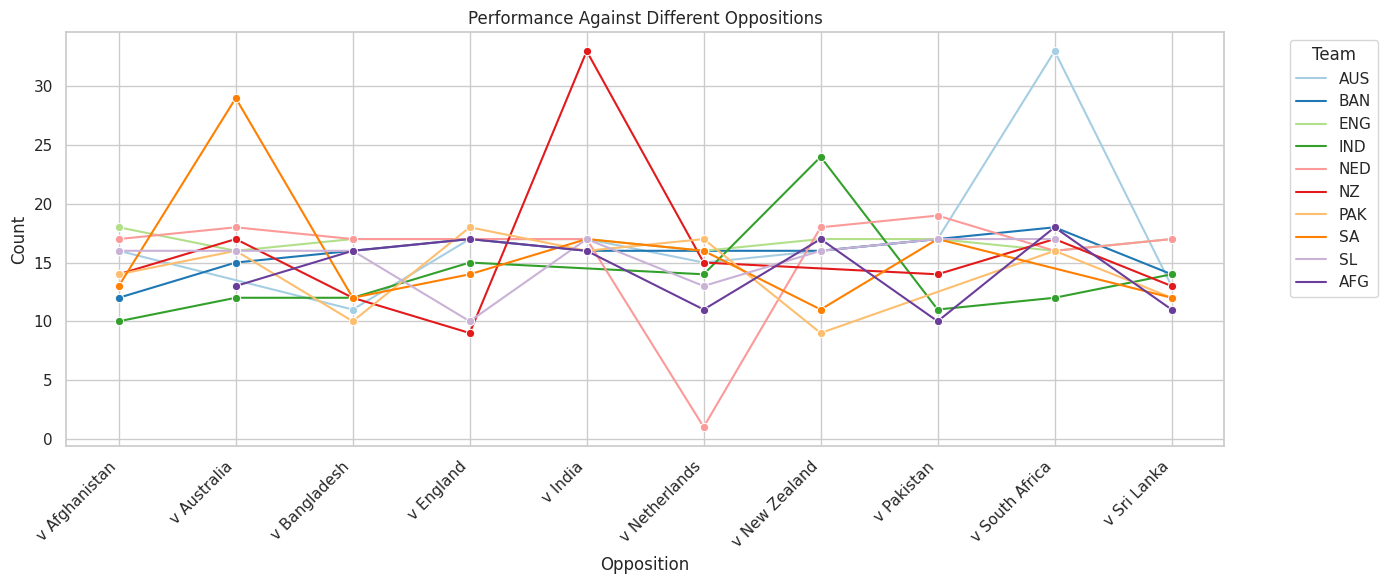

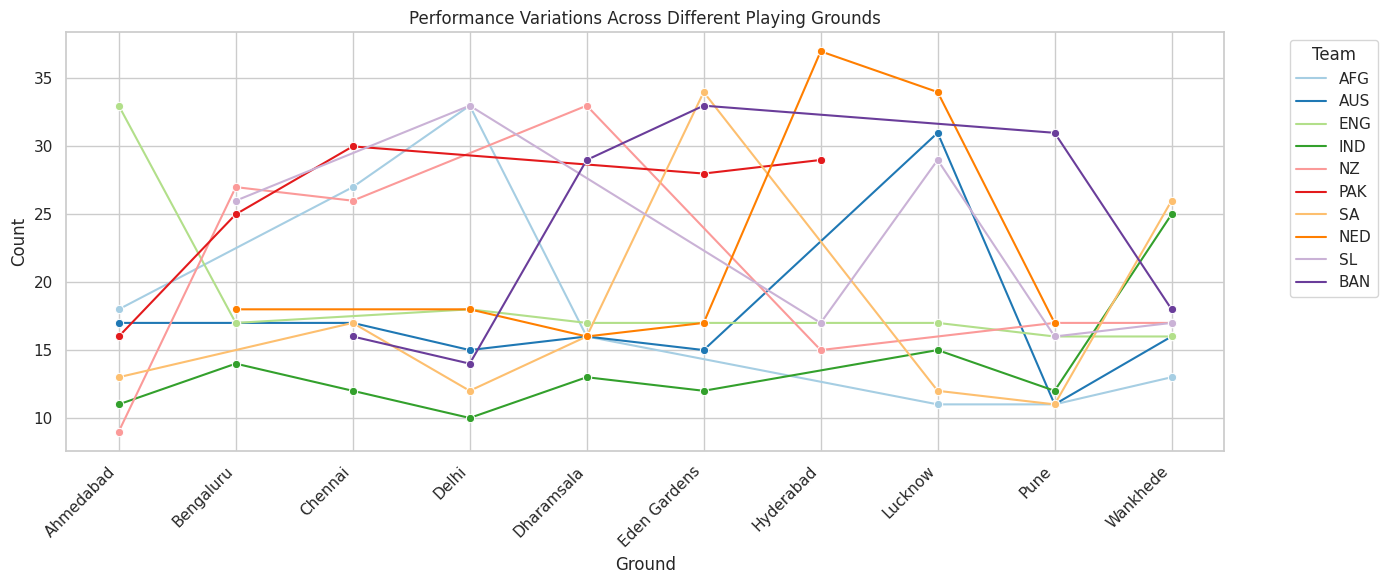

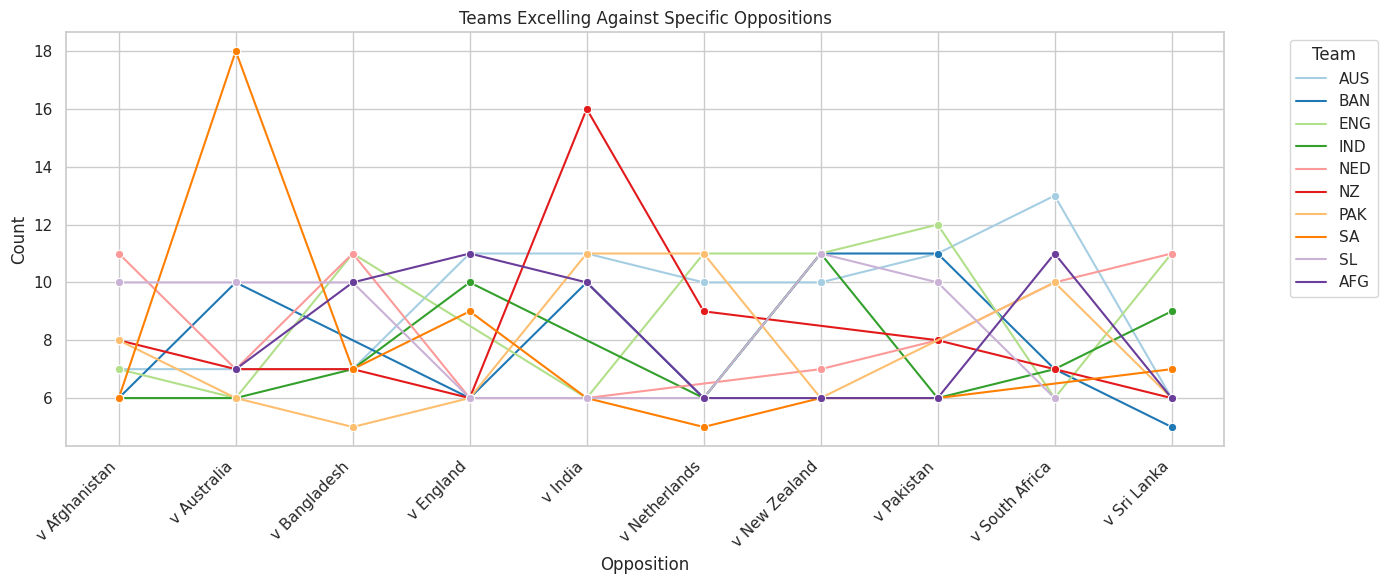

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'df'
# If your data is in a CSV file, you can read it using:
# df = pd.read_csv('your_data_file.csv')

# Display the first few rows of the dataframe
print(df.head())  # Corrected to print the head of the dataframe

# Set a customized color palette
elegant_palette = sns.color_palette("Paired", n_colors=len(df['team'].unique()))

# Opposition Analysis
plt.figure(figsize=(14, 6))
sns.set_palette(elegant_palette)

# Performance against different oppositions
sns.lineplot(x='opposition', y='count', hue='team', data=df.groupby(['opposition', 'team']).size().reset_index(name='count'), palette=elegant_palette, marker='o')
plt.title('Performance Against Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Ground Analysis
plt.figure(figsize=(14, 6))
sns.set_palette(elegant_palette)

# Performance variations across different playing grounds
sns.lineplot(x='ground', y='count', hue='team', data=df.groupby(['ground', 'team']).size().reset_index(name='count'), palette=elegant_palette, marker='o')
plt.title('Performance Variations Across Different Playing Grounds')
plt.xlabel('Ground')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Identify if there are specific teams or players that excel in certain conditions
plt.figure(figsize=(14, 6))
sns.set_palette(elegant_palette)

# Specific teams that excel against specific oppositions
sns.lineplot(x='opposition', y='count', hue='team', data=df[df['inns'] == 1].groupby(['opposition', 'team']).size().reset_index(name='count'), palette=elegant_palette, marker='o')
plt.title('Teams Excelling Against Specific Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [72]:
import pandas as pd
from scipy.stats import ttest_ind

# Display the first few rows of the dataframe
df.head()

# Statistical analysis of players' performance against different oppositions
oppositions = df['opposition'].unique()

for player in df['player'].unique():
    player_data = df[df['player'] == player]

    # Identify two different conditions (e.g., two oppositions)
    condition1 = player_data[player_data['opposition'] == oppositions[0]]['runs']
    condition2 = player_data[player_data['opposition'] == oppositions[1]]['runs']

    # Perform t-test
    t_statistic, p_value = ttest_ind(condition1, condition2, equal_var=False)

    # Print results
    print(f"\nPlayer: {player}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results based on the p-value (e.g., if p-value < 0.05, the difference is statistically significant)
    if p_value < 0.05:
        print("The difference is statistically significant.")
    else:
        print("The difference is not statistically significant.")



Player: Shaheen Shah Afridi (PAK)
T-statistic: 0.16418000753809212
P-value: 0.8853875516040626
The difference is not statistically significant.

Player: DJ Willey (ENG)
T-statistic: 0.21075347334465283
P-value: 0.8564838325860945
The difference is not statistically significant.

Player: MJ Henry (NZ)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: LH Ferguson (NZ)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: Noor Ahmad (AFG)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: Mujeeb Ur Rahman (AFG)
T-statistic: -0.2173000401522222
P-value: 0.8490168540150571
The difference is not statistically significant.

Player: AU Rashid (ENG)
T-statistic: 0.4140952528634979
P-value: 0.7346698312792352
The difference is not statistically significant.

Player: LV van Beek (NED)
T-statistic: -0.5104419352853357
P-value: 0.6728432186591928
The difference is not statistically signific

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1103: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero



Player: K Rabada (SA)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: CBRLS Kumara (SL)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: Rashid Khan (AFG)
T-statistic: -0.4679791927926687
P-value: 0.6964669378302137
The difference is not statistically significant.

Player: JR Hazlewood (AUS)
T-statistic: 0.2007029604500223
P-value: 0.8555458325653057
The difference is not statistically significant.

Player: MM Ali (ENG)
T-statistic: nan
P-value: nan
The difference is not statistically significant.

Player: A Dutt (NED)
T-statistic: -0.317999364001908
P-value: 0.8034081305762077
The difference is not statistically significant.

Player: Mustafizur Rahman (BAN)
T-statistic: 0.8053772169419591
P-value: 0.537300585644719
The difference is not statistically significant.

Player: CN Ackermann (NED)
T-statistic: -2.9711254108328298
P-value: 0.1565969230918553
The difference is not statistically significant.

Player

In [73]:
# Statistical analysis of players' performance against different oppositions
opposition_stats = df.groupby(['player', 'opposition'])['runs'].agg(['mean', 'median']).reset_index()

# Display the summary statistics
print("Statistical Analysis of Players' Performance Against Different Oppositions:")
print(opposition_stats)

# Statistical analysis of players' performance on different playing grounds
ground_stats = df.groupby(['player', 'ground'])['runs'].agg(['mean', 'median']).reset_index()

# Display the summary statistics
print("\nStatistical Analysis of Players' Performance on Different Playing Grounds:")
print(ground_stats)


Statistical Analysis of Players' Performance Against Different Oppositions:
            player      opposition  mean  median
0     A Dutt (NED)   v Afghanistan  29.5    29.5
1     A Dutt (NED)     v Australia  30.0    30.0
2     A Dutt (NED)    v Bangladesh  17.5    17.5
3     A Dutt (NED)       v England  34.0    34.0
4     A Dutt (NED)         v India  28.5    28.5
..             ...             ...   ...     ...
973  WA Young (NZ)     v Australia  32.0    32.0
974  WA Young (NZ)       v England   0.0     0.0
975  WA Young (NZ)         v India  17.0    17.0
976  WA Young (NZ)   v Netherlands  70.0    70.0
977  WA Young (NZ)  v South Africa  33.0    33.0

[978 rows x 4 columns]

Statistical Analysis of Players' Performance on Different Playing Grounds:
            player        ground  mean  median
0     A Dutt (NED)     Bengaluru  28.5    28.5
1     A Dutt (NED)         Delhi  30.0    30.0
2     A Dutt (NED)    Dharamsala  21.0    21.0
3     A Dutt (NED)  Eden Gardens  17.5    17.5
4

In [74]:
# Identify the top 10 players based on total runs scored
top_players = df.groupby('player')['runs'].sum().nlargest(10)

# Identify the top 10 teams based on the total number of wins
top_teams = df[df['inns'] == 1]['team'].value_counts().nlargest(10)

# Display top players and teams
print("Top 10 Players:")
print(top_players)

print("\nTop 10 Teams:")
print(top_teams)


Top 10 Players:
player
R Ravindra (NZ)             971
V Kohli (IND)               726
GJ Maxwell (AUS)            693
BFW de Leede (NED)          626
Azmatullah Omarzai (AFG)    623
LV van Beek (NED)           616
PJ Cummins (AUS)            609
M Jansen (SA)               607
Mehidy Hasan Miraz (BAN)    603
Q de Kock (SA)              594
Name: runs, dtype: int64

Top 10 Teams:
AUS    86
ENG    81
NED    77
SL     75
NZ     74
AFG    73
BAN    72
SA     70
PAK    69
IND    68
Name: team, dtype: int64


In [75]:
# Filter data for top players and teams
top_players_data = df[df['player'].isin(top_players.index)]
top_teams_data = df[df['team'].isin(top_teams.index)]

# Descriptive statistics for top players
player_stats = top_players_data.groupby('player')['runs'].describe()

# Descriptive statistics for top teams
team_stats = top_teams_data.groupby('team')['runs'].describe()

# Display statistics
print("\nStatistical Analysis for Top Players:")
print(player_stats)

print("\nStatistical Analysis for Top Teams:")
print(team_stats)



Statistical Analysis for Top Players:
                          count       mean        std  min    25%   50%  \
player                                                                    
Azmatullah Omarzai (AFG)   17.0  36.647059  25.087201  8.0  19.00  31.0   
BFW de Leede (NED)         17.0  36.823529  33.991240  2.0  10.00  25.0   
GJ Maxwell (AUS)           15.0  46.200000  50.520434  0.0  23.00  35.0   
LV van Beek (NED)          16.0  38.500000  32.310989  0.0  14.50  30.0   
M Jansen (SA)              17.0  35.705882  28.696177  0.0  14.00  31.0   
Mehidy Hasan Miraz (BAN)   18.0  33.500000  19.554599  3.0  19.00  32.5   
PJ Cummins (AUS)           18.0  33.833333  21.680162  6.0  14.00  32.5   
Q de Kock (SA)             10.0  59.400000  60.163112  3.0   8.75  32.5   
R Ravindra (NZ)            19.0  51.105263  34.936283  9.0  26.50  46.0   
V Kohli (IND)              12.0  60.500000  43.301270  0.0  15.25  70.0   

                             75%    max  
player            

4 Temporal Analysis:
 - Study performance trends over time, considering start dates and overs played.
 - Identify any temporal patterns or changes in team and player performance.

  team                     player bat_or_bowl  bb_bf  runs  wkts  \
0  PAK  Shaheen Shah Afridi (PAK)        bowl     60    45   3.0   
1  ENG            DJ Willey (ENG)        bowl     60    45   3.0   
2   NZ              MJ Henry (NZ)        bowl     60    48   3.0   
3   NZ           LH Ferguson (NZ)        bowl     60    49   3.0   
4  AFG           Noor Ahmad (AFG)        bowl     60    49   3.0   

   wicketball_prob  runs_per_ball      opposition     ground  ... mdns  econ  \
0             0.05       0.750000  v South Africa    Chennai  ...  0.0   4.5   
1             0.05       0.750000         v India    Lucknow  ...  2.0   4.5   
2             0.05       0.800000       v England  Ahmedabad  ...  1.0   4.8   
3             0.05       0.816667    v Bangladesh    Chennai  ...  0.0   4.9   
4             0.05       0.816667      v Pakistan    Chennai  ...  0.0   4.9   

   inns   4s   6s   sr  not_out  mins  strike_rate  boundary_rate  
0     2  0.0  0.0  0.0      0.0   0.0     

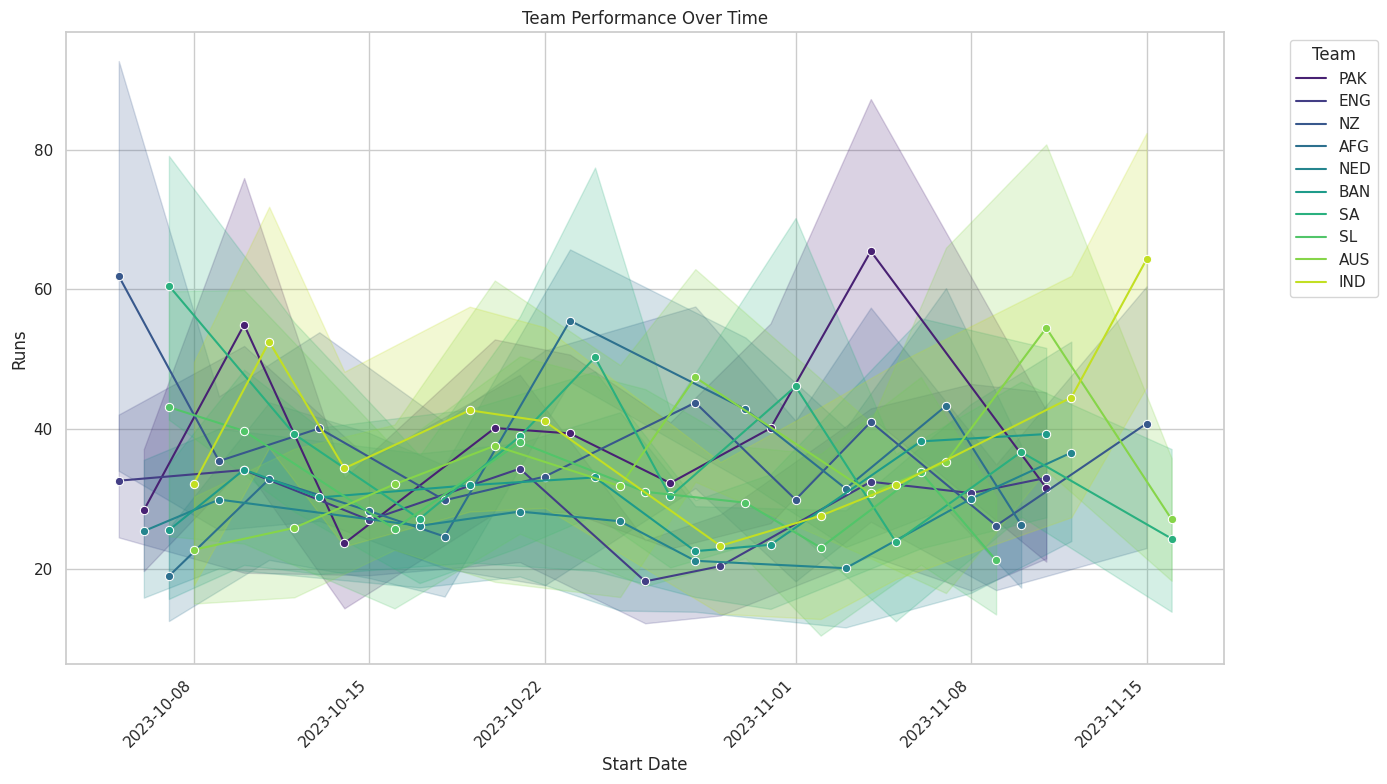

<ipython-input-76-651df01e2d31>:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


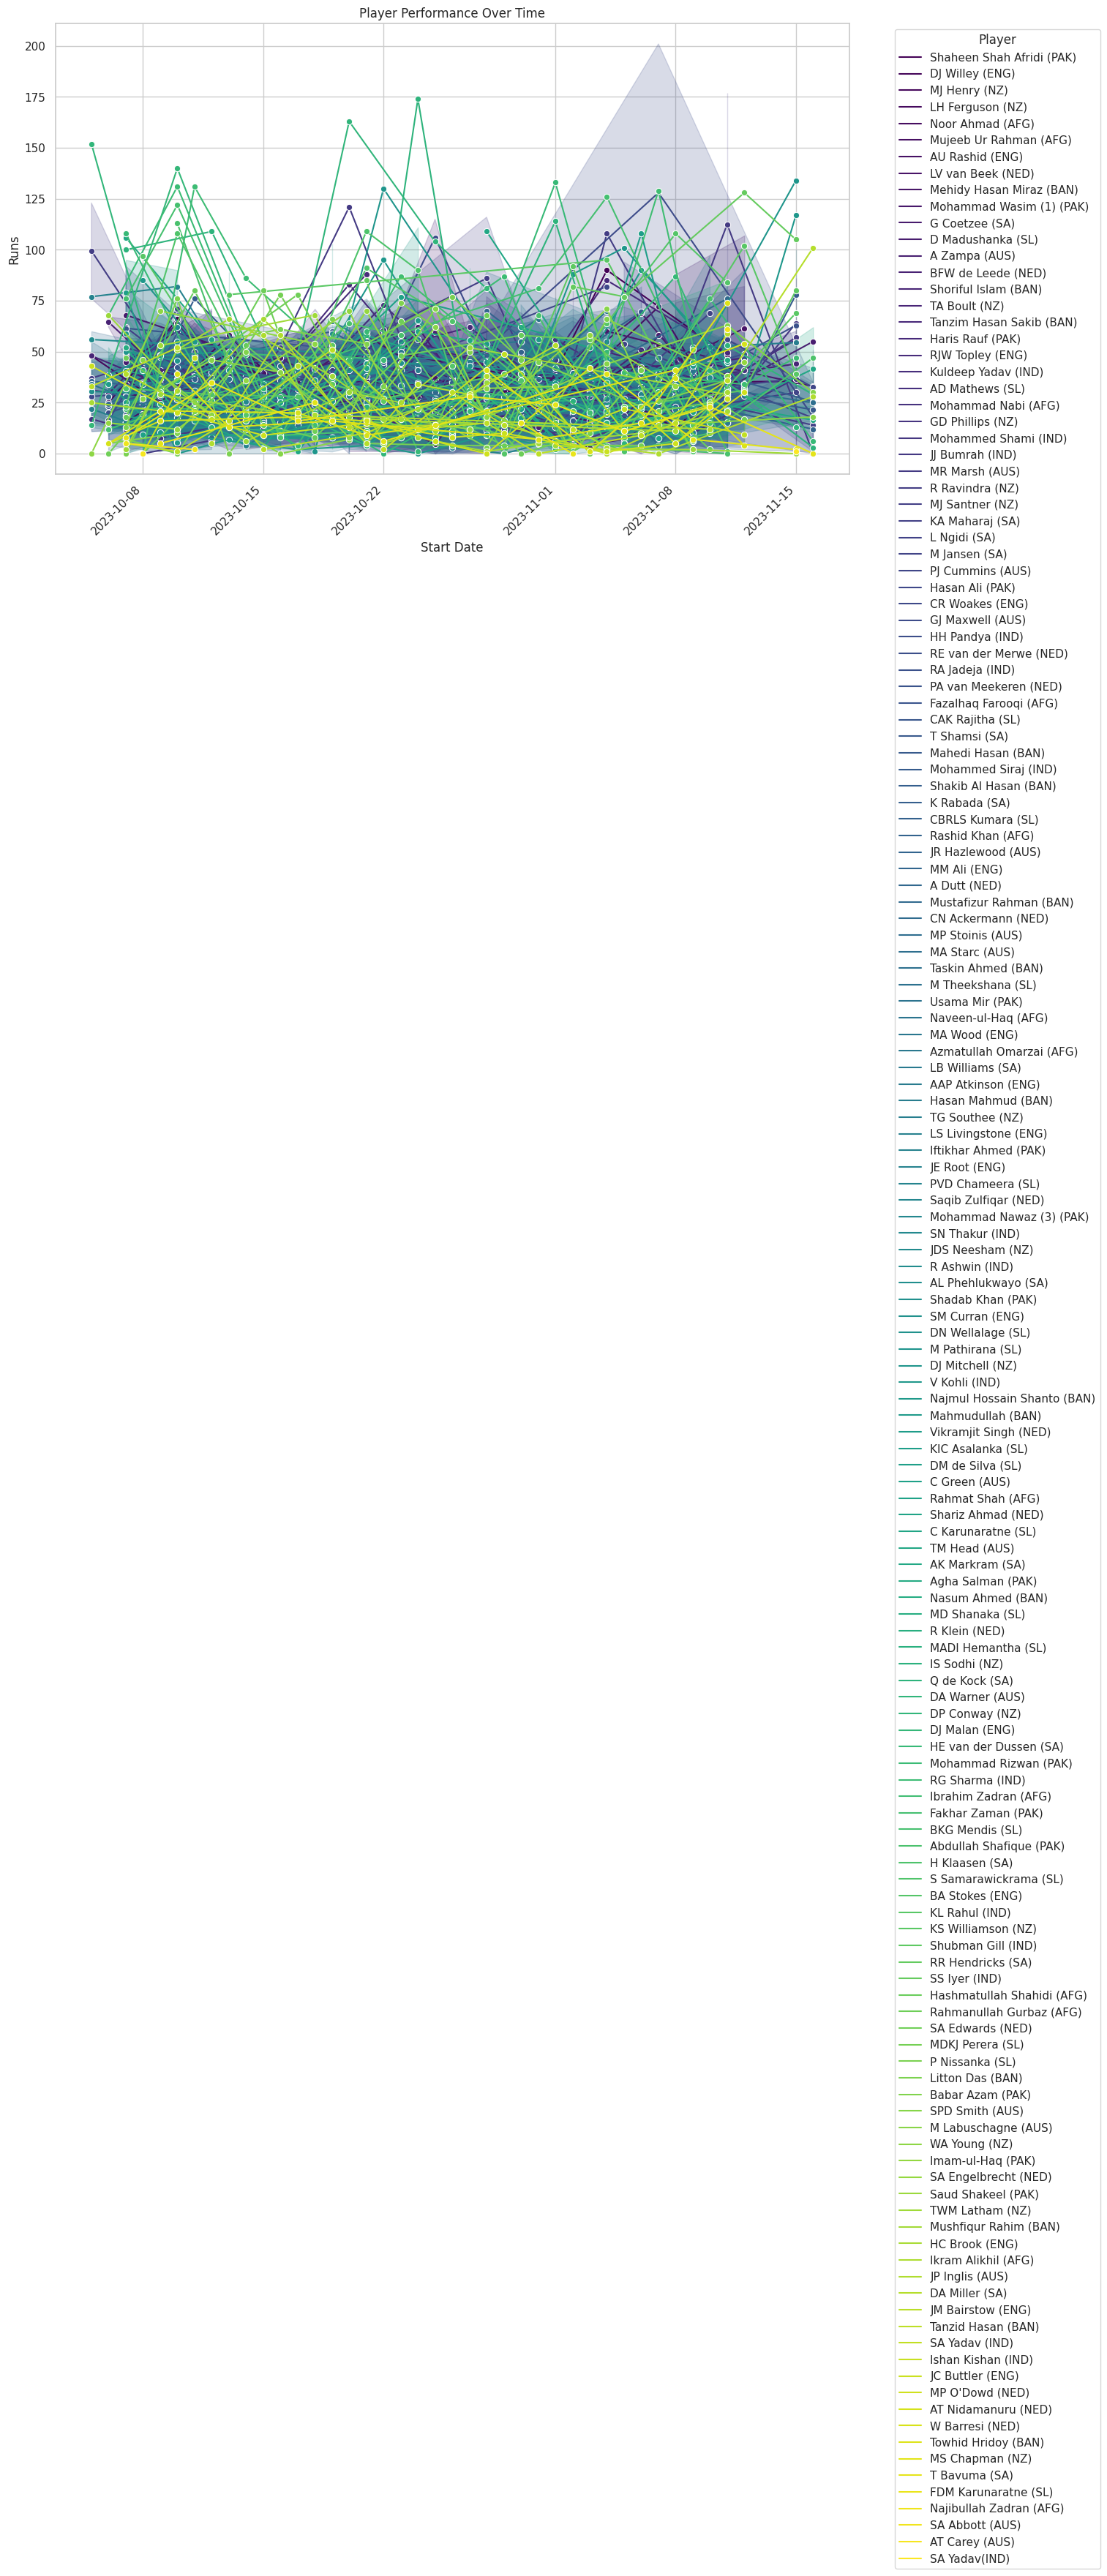

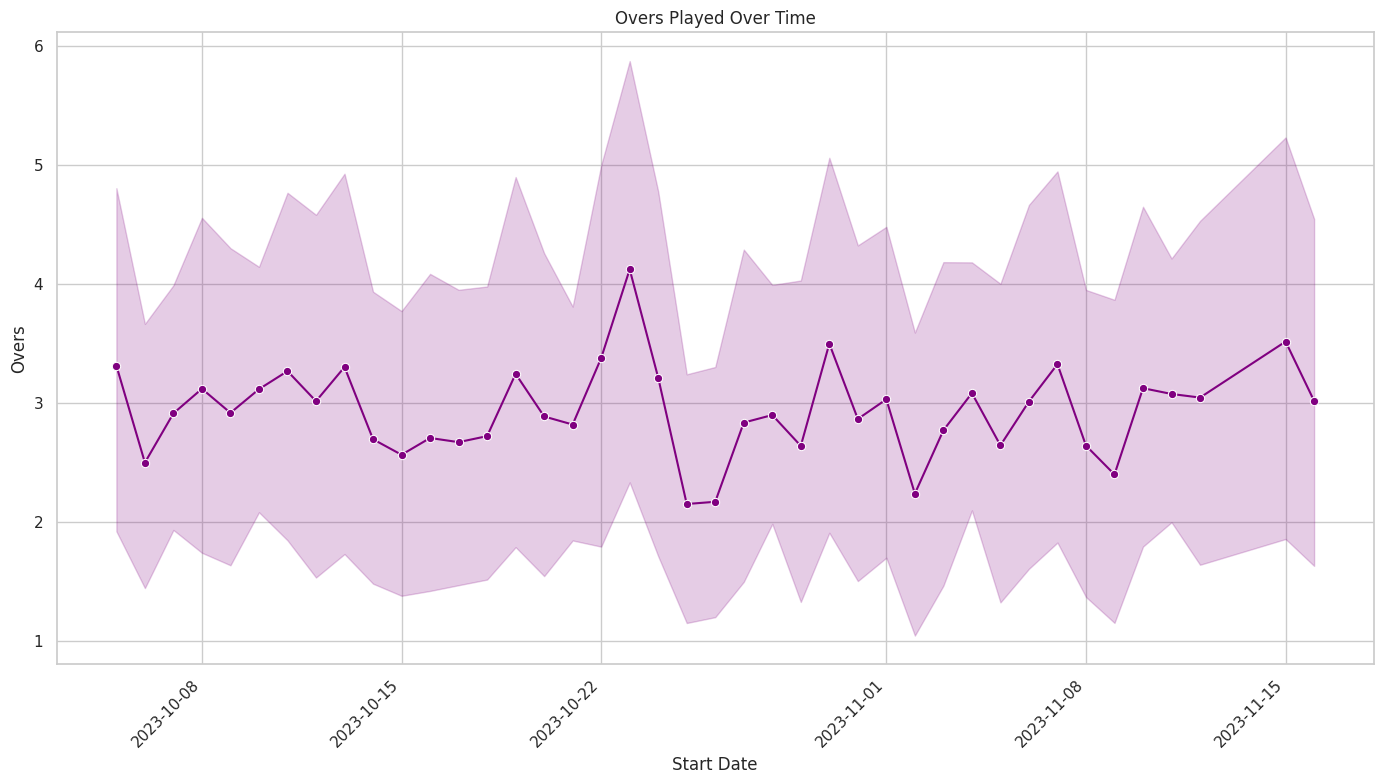

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a variable named 'df'
# If your data is in a CSV file, you can read it using:
# df = pd.read_csv('your_data_file.csv')

# Convert the 'start_date' column to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Display the first few rows of the dataframe
print(df.head())

# Temporal Analysis for Team Performance
plt.figure(figsize=(14, 8))
sns.lineplot(x='start_date', y='runs', hue='team', data=df, marker='o', palette='viridis')
plt.title('Team Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Temporal Analysis for Player Performance
plt.figure(figsize=(14, 8))
sns.lineplot(x='start_date', y='runs', hue='player', data=df, marker='o', palette='viridis')
plt.title('Player Performance Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Temporal Analysis for Overs Played
plt.figure(figsize=(14, 8))
sns.lineplot(x='start_date', y='overs', data=df, marker='o', color='purple')
plt.title('Overs Played Over Time')
plt.xlabel('Start Date')
plt.ylabel('Overs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [79]:
# Install necessary packages
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-generic-recommended pandoc

# Install Python package for pandoc
!pip install pypandoc

# Convert Colab notebook to PDF
!jupyter nbconvert --to PDF "/content/drive/MyDrive/Colab Notebooks/Cricket World Cup Analysis.ipynb"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package texlive-generic-recommended
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Cricket World Cup Analysis.ipynb to PDF
[NbConvertApp] Support files will be in Cricket World Cup Analysis_files/
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Analysis_files
[NbConvertApp] Making directory ./Cricket World Cup Anal